Import necessary libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plots import plot_data, plot_confusion_matrix, plot_all_confusion_matrices
from utils import read_from_csv, result_to_df, evaluate_model, evaluate_all_models


# Biological model
from odes_model import odes_estimated_params
from random_model import random_estimated_params
from sdes_model import sdes_estimated_params
from sdes_minimize_model import sdes_minimize_estimated_params
from odes_minimize_model import odes_minimize_estimated_params
from lr_model import lr_estimated_params, normalize_network, binarize_network

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, r2_score

        SWI5    CBF1    GAL4   GAL80    ASH1
time                                        
0     0.0760  0.0419  0.0207  0.0225  0.1033
10    0.0186  0.0365  0.0122  0.0175  0.0462
20    0.0090  0.0514  0.0073  0.0165  0.0439
30    0.0117  0.0473  0.0079  0.0147  0.0371
40    0.0088  0.0482  0.0084  0.0145  0.0475
50    0.0095  0.0546  0.0100  0.0144  0.0468
60    0.0075  0.0648  0.0096  0.0106  0.0347
70    0.0070  0.0552  0.0107  0.0119  0.0247
80    0.0081  0.0497  0.0113  0.0104  0.0269
90    0.0057  0.0352  0.0116  0.0142  0.0190
100   0.0052  0.0358  0.0073  0.0084  0.0134
110   0.0093  0.0338  0.0075  0.0097  0.0148
120   0.0055  0.0309  0.0082  0.0088  0.0101
130   0.0060  0.0232  0.0078  0.0087  0.0088
140   0.0069  0.0191  0.0089  0.0086  0.0080
150   0.0093  0.0190  0.0104  0.0110  0.0090
160   0.0090  0.0176  0.0114  0.0124  0.0113
170   0.0129  0.0105  0.0100  0.0093  0.0154
180   0.0022  0.0081  0.0086  0.0079  0.0030
190   0.0018  0.0072  0.0078  0.0103  0.0012


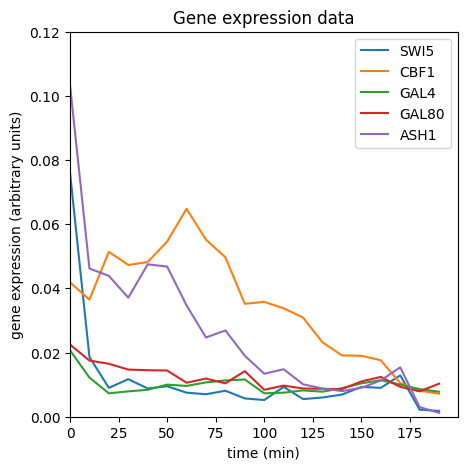

In [2]:
# Read data
gene_df = read_from_csv("data.csv")
print(gene_df)
ground_truth_network_structure = result_to_df(np.array([[0, 1, 0, 0, 0],
                                                        [0, 0, 1, 0, 0],
                                                        [0, 0, 0, 0, 1],
                                                        [0, 0, 0, 0, 0],
                                                        [1, 1, 0, 1, 0]]))
# Define the ODE system
plot_data(gene_df)

Random Model (Not based on the data)

In [3]:
random_network_structure = random_estimated_params()


ODEs model with/without optimization

In [4]:
# Initial conditions and parameters
y0 = [0.0760, 0.0419, 0.0207, 0.0225, 0.1033]
t = np.linspace(0, 190, 20)
odes_network_structure = odes_estimated_params(gene_df, y0, t)
odes_minimize_network_structure = odes_minimize_estimated_params(gene_df, y0, t)

SDEs model with/without optimization

In [5]:
# Example usage
noise_std = 2
sdes_network_structure = sdes_estimated_params(gene_df, y0, t, noise_std)
sdes_minimize_estimated_params = sdes_minimize_estimated_params(gene_df, y0, t, noise_std)

Linear Regression model

In [6]:
lr_network_structure =  lr_estimated_params(gene_df)


In [7]:
print("Ground Truth Network Structure:")
print(ground_truth_network_structure)
print("Random Network Structure:")
print(random_network_structure)
print("ODEs Network Structure:")
print(odes_network_structure)
print("ODEs Minimize Network Structure:")
print(odes_minimize_network_structure)
print("SDEs Network Structure:")
print(sdes_network_structure)
print("SDEs Minimize Network Structure:")
print(sdes_minimize_estimated_params)
print("LR Network Structure:")
print(lr_network_structure)


Ground Truth Network Structure:
       ASH1  CBF1  GAL4  GAL80  SWI5
ASH1    0.0   1.0   0.0    0.0   0.0
CBF1    0.0   0.0   1.0    0.0   0.0
GAL4    0.0   0.0   0.0    0.0   1.0
GAL80   0.0   0.0   0.0    0.0   0.0
SWI5    1.0   1.0   0.0    1.0   0.0
Random Network Structure:
           ASH1      CBF1      GAL4     GAL80      SWI5
ASH1   0.380227  0.838969  0.397337  0.181657  0.017685
CBF1   0.445571  0.042501  0.024165  0.766650  0.967659
GAL4   0.963829  0.022433  0.113818  0.967696  0.071475
GAL80  0.026349  0.068411  0.135633  0.200627  0.037486
SWI5   0.939312  0.413363  0.499787  0.130218  0.844749
ODEs Network Structure:
           ASH1      CBF1      GAL4     GAL80      SWI5
ASH1   0.120077  0.033130  0.097444  0.063422  0.057740
CBF1   0.679087  0.331297  0.588553  0.452467  0.429740
GAL4   0.741199  0.364427  0.643121  0.495694  0.471073
GAL80  1.000000  0.502468  0.870486  0.675808  0.643295
SWI5   0.057965  0.000000  0.042876  0.020195  0.016407
ODEs Minimize Network St

In [8]:
# Combining all the models together and plotting in the figure with different suplots
output_truth_network_structure_list = [
    random_network_structure,
    odes_network_structure,
    odes_minimize_network_structure,
    sdes_network_structure,
    sdes_minimize_estimated_params,
    lr_network_structure,
    ]
output_truth_network_structure_description_list = [
    "Random",
    "ODEs",
    "ODEs Minimize",
    "SDEs",
    "SDEs Minimize",
    "Linear Regression",
    ]

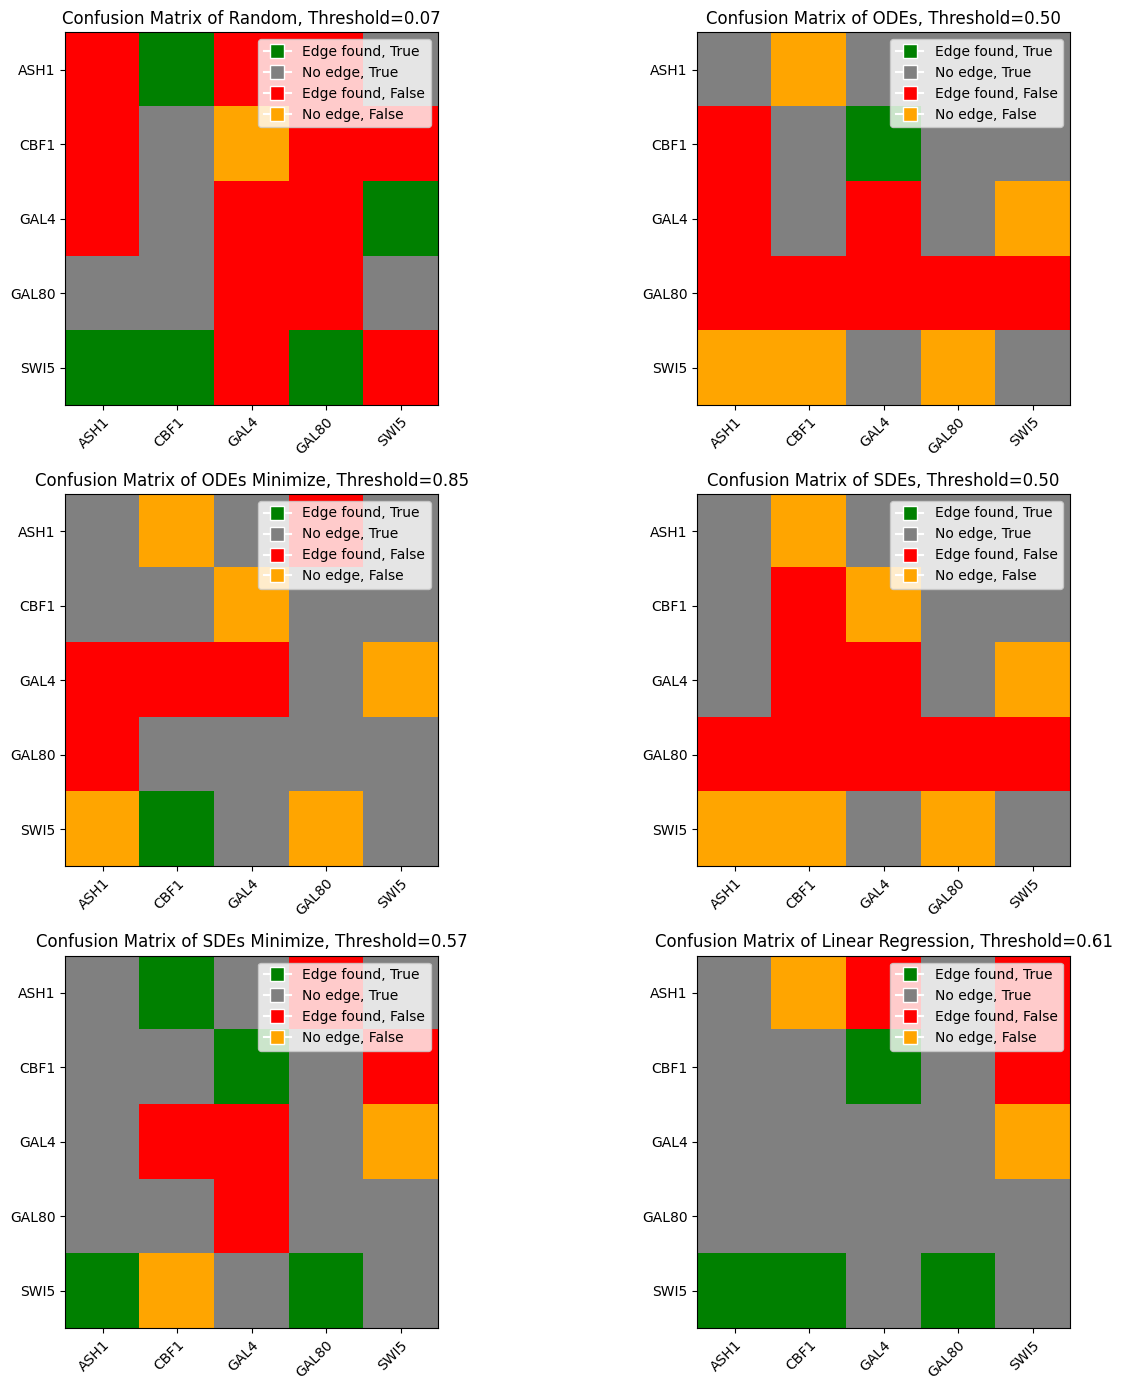

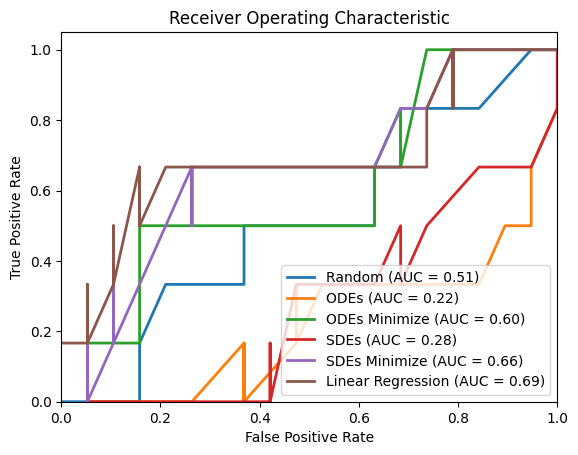

In [9]:
plot_all_confusion_matrices(ground_truth_network_structure,
                            output_truth_network_structure_list,
                            output_truth_network_structure_description_list)
evaluate_all_models(ground_truth_network_structure,
                    output_truth_network_structure_list,
                    output_truth_network_structure_description_list)